## Selenium 으로 구글에서 기사 크롤링 

In [16]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
import pandas as pd

In [ ]:
driver = webdriver.Chrome("/Users/yeona/Downloads/chromedriver-3") 
driver.get('http://www.google.com') # 구글로 이동
target=driver.find_element_by_css_selector("[name = 'q']") 
target.send_keys('애플') # 검색창에 타겟입력
target.send_keys(Keys.ENTER) # 엔터 
news = driver.find_element_by_css_selector('#hdtb-msb > div:nth-child(1) > div > div:nth-child(2) > a') #뉴스탭
news.click() #뉴스탭클릭

# 헤드라인 수집
news_name = []
news_title = []
news_contents = []

# 페이지 넘기는 for문(2페이지 selector가 3부터 시작)
for i in range(3,16) :    
    
    # 기사 title, contents에 대한 for문
    for k in range(1,11):
        
        
        try :
            
            #신문사 이름 
            name = driver.find_element_by_css_selector('#rso > div:nth-child('+ str(k) +') > g-card > div > div > a > div > div.iRPxbe > div.CEMjEf > span')
            #name = name.text
            news_name.append(name.text)
            
            #뉴스제목
            title = '#rso > div:nth-child(' + str(k) +') > g-card > div > div > a > div > div.iRPxbe > div.mCBkyc.JQe2Ld.nDgy9d'
            title = driver.find_element_by_css_selector(title)
            news_title.append(title.text)
         
            
            #내용
            contents = '#rso > div:nth-child('+ str(k) +') > g-card > div > div > a > div > div.iRPxbe > div.GI74Re.nDgy9d'    
            contents = driver.find_element_by_css_selector(contents)
            news_contents.append(contents.text)
            print(name.text, title.text, contents.text)
            
        except :
            print(str(i) + "페이지" +str(k) +"번째 기사에서 오류가 발생했습니다.")
    
    # 페이지 넘기기
    page = driver.find_element_by_css_selector('#xjs > table > tbody > tr > td:nth-child(' + str(i) +') > a')
    page.click()

#df = pd.DataFrame({'name':news_name, 'title':news_title, 'contents':news_contents})
#display(df)

In [26]:
df = pd.DataFrame({'name':news_name, 'title':news_title, 'contents':news_contents})
display(df)
df.to_csv('../data/apple.csv',encoding='utf8')

,name,title,contents
0,글로벌경제신문,美국채금리 급등에 대형기술주 직격탄...애플(2.38%) 아마존(2.64%) MS(...,뉴욕증시가 미국채금리 급등 영향으로 큰 폭으로 하락했다. 28일(현지시간) 뉴욕증권...
1,지디넷코리아,"애플, iOS·맥용 생산성 앱 업데이트","애플이 키노트, 페이지, 넘버스 등 iOS·맥용 생산성 앱에 새로운 기능을 업데이트..."
2,YTN,"페라리, 애플 디자인팀 수장 출신 아이브와 손잡아",고급 스포츠카 제조사 페라리가 애플의 전 최고디자인책임자(CDO) 조니 아이브와 손...
3,조선일보,"애플, 아마존, 구글 등 주가 잇따라 급락 - 조선일보","애플, 아마존, 구글 등 주가 잇따라 급락 방현철 박사의 월스트리트 뒤늦은 테이퍼링..."
4,JTBC뉴스,"빛을 잃은 도시, 멈춘 애플 공장…중국, 최악의 전력난","전력난을 겪고 있는 중국에선 곳곳에서 전기가 끊겼다, 들어왔다를 반복하고 있습니다...."
...,...,...,...
124,전자신문,iOS15…글라스…미리 보는 애플 'WWDC21',음식 추적 기능·새 잠금 화면 디자인 촉각 아이패드 '홈 스크린' 대대적인 변화 예...
125,전자신문,"""애플, '아이폰13' 9월 14일 공개한다""",IT 전문 매체 폰아레나는 22일(현지시간) 댄 아이브스 웨드부시 증권 애널리스트를...
126,전자신문,"애플, 아이패드에 OLED 채택 확정...중소형 OLED 투자 기대",애플과 디스플레이 업체들은 생산 및 납품을 합의한 것으로 알려졌다. 아이패드용 OL...
127,전자신문,내달 양산 들어가는 애플 '에어팟3'...가격은?,애플이 올 하반기 출시를 목표로 차세대 무선 이어폰 '에어팟3(가칭)'를 준비하고 ...


In [27]:
#csv파일 불러오기
df= pd.read_csv("../data/apple.csv")

,Unnamed: 0,name,title,contents
0,0,글로벌경제신문,美국채금리 급등에 대형기술주 직격탄...애플(2.38%) 아마존(2.64%) MS(...,뉴욕증시가 미국채금리 급등 영향으로 큰 폭으로 하락했다. 28일(현지시간) 뉴욕증권...
1,1,지디넷코리아,"애플, iOS·맥용 생산성 앱 업데이트","애플이 키노트, 페이지, 넘버스 등 iOS·맥용 생산성 앱에 새로운 기능을 업데이트..."
2,2,YTN,"페라리, 애플 디자인팀 수장 출신 아이브와 손잡아",고급 스포츠카 제조사 페라리가 애플의 전 최고디자인책임자(CDO) 조니 아이브와 손...
3,3,조선일보,"애플, 아마존, 구글 등 주가 잇따라 급락 - 조선일보","애플, 아마존, 구글 등 주가 잇따라 급락 방현철 박사의 월스트리트 뒤늦은 테이퍼링..."
4,4,JTBC뉴스,"빛을 잃은 도시, 멈춘 애플 공장…중국, 최악의 전력난","전력난을 겪고 있는 중국에선 곳곳에서 전기가 끊겼다, 들어왔다를 반복하고 있습니다...."
...,...,...,...,...
124,124,전자신문,iOS15…글라스…미리 보는 애플 'WWDC21',음식 추적 기능·새 잠금 화면 디자인 촉각 아이패드 '홈 스크린' 대대적인 변화 예...
125,125,전자신문,"""애플, '아이폰13' 9월 14일 공개한다""",IT 전문 매체 폰아레나는 22일(현지시간) 댄 아이브스 웨드부시 증권 애널리스트를...
126,126,전자신문,"애플, 아이패드에 OLED 채택 확정...중소형 OLED 투자 기대",애플과 디스플레이 업체들은 생산 및 납품을 합의한 것으로 알려졌다. 아이패드용 OL...
127,127,전자신문,내달 양산 들어가는 애플 '에어팟3'...가격은?,애플이 올 하반기 출시를 목표로 차세대 무선 이어폰 '에어팟3(가칭)'를 준비하고 ...


In [30]:
import re

# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글 처음부터 끝을 알리는 정규표현식
    result = hangul.sub('', text)
    return result

In [34]:
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df.head()

,Unnamed: 0,name,title,contents
0,0,글로벌경제신문,국채금리 급등에 대형기술주 직격탄애플 아마존 하락,뉴욕증시가 미국채금리 급등 영향으로 큰 폭으로 하락했다. 28일(현지시간) 뉴욕증권...
1,1,지디넷코리아,애플 맥용 생산성 앱 업데이트,"애플이 키노트, 페이지, 넘버스 등 iOS·맥용 생산성 앱에 새로운 기능을 업데이트..."
2,2,YTN,페라리 애플 디자인팀 수장 출신 아이브와 손잡아,고급 스포츠카 제조사 페라리가 애플의 전 최고디자인책임자(CDO) 조니 아이브와 손...
3,3,조선일보,애플 아마존 구글 등 주가 잇따라 급락 조선일보,"애플, 아마존, 구글 등 주가 잇따라 급락 방현철 박사의 월스트리트 뒤늦은 테이퍼링..."
4,4,JTBC뉴스,빛을 잃은 도시 멈춘 애플 공장중국 최악의 전력난,"전력난을 겪고 있는 중국에선 곳곳에서 전기가 끊겼다, 들어왔다를 반복하고 있습니다...."


In [35]:
from konlpy.tag import Okt
from collections import Counter

# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../rider/data/korean_stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stopwords]
    
    return nouns

In [36]:
# ‘ko_text’ 피처에 이를 적용합니다.
# display(df[0])
df['요약'] = df['title'].apply(lambda x: get_nouns(x))
print(df.shape)
df.head()

(129, 5)


,Unnamed: 0,name,title,contents,요약
0,0,글로벌경제신문,국채금리 급등에 대형기술주 직격탄애플 아마존 하락,뉴욕증시가 미국채금리 급등 영향으로 큰 폭으로 하락했다. 28일(현지시간) 뉴욕증권...,"[국채, 금리, 급등, 대형, 기술, 직격탄, 애플, 아마존, 하락]"
1,1,지디넷코리아,애플 맥용 생산성 앱 업데이트,"애플이 키노트, 페이지, 넘버스 등 iOS·맥용 생산성 앱에 새로운 기능을 업데이트...","[애플, 맥용, 생산, 업데이트]"
2,2,YTN,페라리 애플 디자인팀 수장 출신 아이브와 손잡아,고급 스포츠카 제조사 페라리가 애플의 전 최고디자인책임자(CDO) 조니 아이브와 손...,"[페라리, 애플, 디자인, 수장, 출신, 아이브]"
3,3,조선일보,애플 아마존 구글 등 주가 잇따라 급락 조선일보,"애플, 아마존, 구글 등 주가 잇따라 급락 방현철 박사의 월스트리트 뒤늦은 테이퍼링...","[애플, 아마존, 구글, 주가, 급락, 조선일보]"
4,4,JTBC뉴스,빛을 잃은 도시 멈춘 애플 공장중국 최악의 전력난,"전력난을 겪고 있는 중국에선 곳곳에서 전기가 끊겼다, 들어왔다를 반복하고 있습니다....","[도시, 애플, 공장, 중국, 최악, 전력]"


In [38]:
news_corpus = "".join(df['title'].tolist())
print(news_corpus)

국채금리 급등에 대형기술주 직격탄애플 아마존  하락애플 맥용 생산성 앱 업데이트페라리 애플 디자인팀 수장 출신 아이브와 손잡아애플 아마존 구글 등 주가 잇따라 급락  조선일보빛을 잃은 도시 멈춘 애플 공장중국 최악의 전력난아이폰 확 달라지나부터 완전히 다시 설계중국 전력난 글로벌 공급망 위협애플테슬라도 여파애플이  표준 충전기 반대하는 진짜 이유애플은 왜삼성 갤폴드 플립 흥행에도 출시 계획 감감무소식 속내는인치 애플 첫  아이패드 프로젝트 중단구글애플 등 부가세액 급증법인세는 쥐꼬리애플 포항에 개발자 아카데미 세운다포스텍에서 연 명 아이패드 미니 젤리 스크롤 문제 애플 의 정상적 동작아이폰에 충전기 왜 없나브라질 애플에 또 벌금 부과지구 덜 아프게 하는 애플 다이어트 함께 하실래요애플 서 증강현실 길안내지도 띄운다단독 국내 유통업계 최초 잠실 롯데월드몰에 애플스토어 유치애플 프리스비 아이폰   일 출시 일부터 사전예약 실시조 상속받은 애플 잡스 부인 지구 살리는 데 조원 쓴다전력난에애플 협력사들 공장 가동 일시 중단  조선일보올림픽 앞둔 중국 전력난애플 공장 곳곳 가동중단애플 아이폰 공개 임박 애플스토어는 새 단장 중  조선비즈애플 새 맥북프로에  비율 디스플레이 탑재구글애플 플랫폼 국감 앞두고 상생안 발표눈 가리고 아웅 애플 아이폰 는 완전히 새로운 디자인  애플   베타  버전서 애플워치 잠금해제 오류 수정년째 호환 불가 아이폰 충전기 고수하는 애플의 속내는페라리 애플 디자인 수장 출신 아이브와 손잡아애플 사이버 전쟁용 해킹도구 페가수스 막을 긴급 업데이트 발표데스커 애플박물관을 훔치다 전시 메인 주관사 참여애플  에픽 인앱 결제 법원 판결 앱 공급사에 부여하는 의미는아이폰 혁신 없어도 인기 삼성 폴더블 영토확장 관심 집중애플 생산성 앱 업데이트프리젠테이션문서 작업 성능 개선애플 한 번 접을 때 삼성 두세 번 접을 것폴더블폰 시장 커진다 강경주의 카페아이폰 온다미리보는 애플 스페셜 이벤트금리쇼크에도 애플 는 팔면 안되는 이유  조선일보처음엔 혁신없다 욕하더

In [39]:
from konlpy.tag import Okt
from collections import Counter

# 명사 키워드를 추출
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(news_corpus)
count = Counter(nouns)

# 한글자 키워드를 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'애플': 127, '아이폰': 24, '워치': 14, '공개': 12, '삼성': 11, '구글': 10, '조선': 10, '비즈': 10, '출시': 7, '조선일보': 6, '중국': 6, '전력': 6, '충전기': 5, '아이패드': 5, '더블': 5, '디자인': 4, '급락': 4, '공장': 4, '중단': 4, '박물관': 4, '관사': 4, '결제': 4, '성능': 4, '시장': 4, '샤오미': 4, '부품': 4, '행사': 4, '금리': 3, '하락': 3, '업데이트': 3, '페라리': 3, '수장': 3, '출신': 3, '아이브': 3, '다시': 3, '테슬라': 3, '이유': 3, '애플스토어': 3, '가동': 3, '발표': 3, '데스': 3, '참여': 3, '인앱': 3, '혁신': 3, '주의': 3, '뉴욕증시': 3, '마감': 3, '프로': 3, '투자': 3, '공급': 3, '선비': 3, '경쟁': 3, '전자': 3, '스마트폰': 3, '진출': 3, '국채': 2, '급등': 2, '아마존': 2, '생산': 2, '주가': 2, '글로벌': 2, '포항': 2, '개발자': 2, '미니': 2, '지구': 2, '최초': 2, '롯데': 2, '잡스': 2, '조원': 2, '협력': 2, '임박': 2, '맥북프로': 2, '국감': 2, '해제': 2, '오류': 2, '호환': 2, '전시': 2, '메인': 2, '법원': 2, '인기': 2, '이벤트': 2, '하반기': 2, '지수': 2, '테크': 2, '모델': 2, '한국': 2, '특허': 2, '해외': 2, '테스트': 2, '구성': 2, '전망': 2, '전기': 2, '방위': 2, '쿠팡': 2, '증인': 2, '채택': 2, '폴디드줌': 2, '억대': 2, '사진': 2, '주식': 2, '신제품': 2, '이노': 2, '맥북': 2, '에어팟': 2, '언제': 2, '학교'

In [40]:
# 단어 빈도수가 5 이하인 것들 제거.
df = Counter({key : value for key, value in remove_char_counter.items() if value >= 3})
#df = {key : value for key, value in remove_char_counter.items() if value >= 5}
print(df)


Counter({'애플': 127, '아이폰': 24, '워치': 14, '공개': 12, '삼성': 11, '구글': 10, '조선': 10, '비즈': 10, '출시': 7, '조선일보': 6, '중국': 6, '전력': 6, '충전기': 5, '아이패드': 5, '더블': 5, '디자인': 4, '급락': 4, '공장': 4, '중단': 4, '박물관': 4, '관사': 4, '결제': 4, '성능': 4, '시장': 4, '샤오미': 4, '부품': 4, '행사': 4, '금리': 3, '하락': 3, '업데이트': 3, '페라리': 3, '수장': 3, '출신': 3, '아이브': 3, '다시': 3, '테슬라': 3, '이유': 3, '애플스토어': 3, '가동': 3, '발표': 3, '데스': 3, '참여': 3, '인앱': 3, '혁신': 3, '주의': 3, '뉴욕증시': 3, '마감': 3, '프로': 3, '투자': 3, '공급': 3, '선비': 3, '경쟁': 3, '전자': 3, '스마트폰': 3, '진출': 3})


In [41]:
# 위의 결과를 보기 쉽게 display
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 5] # 시각화의 편의를 위해 ‘nodesize’ 5 이하는 제거
#display(node_df)
node_df.head()

,node,nodesize
6,애플,127
17,구글,10
20,조선일보,6
23,중국,6
25,전력,6


In [ ]:
#node_df.set_index('node')['nodesize'].to_dict()

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np

In [44]:
#맥 한글폰트지정 
from matplotlib import rc
rc('font', family='AppleGothic')

#wordcloud 이미지 모양
mask = np.array(Image.open("../rider/data/그림1.jpg"))

In [17]:
#특정 키워드 제거 (generate_from_frequencies()에서는 stopwords 작동x 따라서 미리 삭제
df.pop('라이더')
df.pop('배달')
df.pop('아주경제')
df.pop('노컷뉴스')
df.pop('경찰청')
df.pop('안전')
df.pop('만난')

144

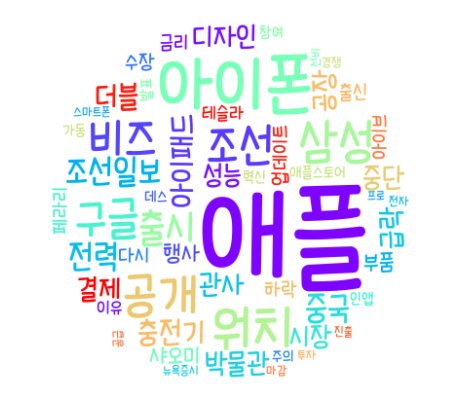

In [45]:
wordcloud = WordCloud(#stopwords=stopwords,
                      font_path='../rider/data/THEdog.ttf',
                      colormap='rainbow',
                      relative_scaling = 0.5, 
                      background_color='white',
                      width=500,
                      height=400,
                       mask = mask,
                      ).generate_from_frequencies(df)

fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
#plt.tigth_layout(pad=0)
plt.axis("off")
plt.show()
fig.savefig('../rider/data/wordcloud_apple.png')